In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data = pd.read_csv("Companydata.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Text(0.5, 0, 'sales')

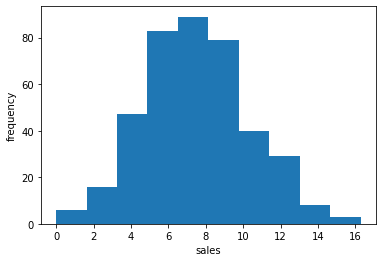

In [4]:
plot = plt.hist(data['Sales'])
plt.ylabel('frequency')
plt.xlabel('sales')

In [5]:
#so now we will first convert sales in categorical variable with "yes" = sales> 8 and "no" = <8.

In [6]:
category = pd.cut(data.Sales,bins=[0,8,20],labels=['0','1'])

In [7]:
data.insert(0,'sales',category)

In [8]:
data

,sales,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,0,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
company = data.drop('Sales',axis=1)

In [10]:
company

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
label_encoder = preprocessing.LabelEncoder()
company['US']= label_encoder.fit_transform(company['US']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
 

In [12]:
company

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [20]:
company.dtypes

sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [21]:
company['sales']=pd.to_numeric(company['sales'],errors='coerce')

In [22]:
company.dtypes

sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [23]:
company.isnull().sum()

sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [24]:
company['sales'] = company['sales'].fillna(0)

In [25]:
#normalize data
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [27]:
company = norm_func(company)
company.head(10)

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,1.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,1.0,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.0,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.0,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
5,1.0,0.479592,0.929293,0.448276,0.983968,0.287425,0.0,0.963636,0.750,0.0,1.0
6,0.0,0.387755,0.848485,0.000000,0.070140,0.502994,1.0,0.836364,0.625,1.0,0.0
7,1.0,0.602041,0.606061,0.517241,0.831663,0.574850,0.5,0.763636,0.000,1.0,1.0
8,0.0,0.561224,0.898990,0.000000,0.196393,0.598802,1.0,0.927273,0.000,0.0,0.0
9,0.0,0.561224,0.929293,0.000000,0.242485,0.598802,1.0,0.927273,0.875,0.0,1.0


In [28]:
x = company.iloc[:, 1:11].values
y =  company.iloc[:,0].values

In [29]:
x

array([[0.62244898, 0.52525253, 0.37931034, ..., 0.875     , 1.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 0.        , 1.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 1.        , 1.        ,
        1.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 0.25      , 1.        ,
        1.        ],
       [0.58163265, 0.16161616, 0.        , ..., 0.75      , 1.        ,
        1.        ]])

In [30]:
y

array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [31]:
# Random Forest Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=0)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()) 

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8099999999999999
